# Descriptive and Exploratory Data Analysis

In [122]:
# %config Completer.use_jedi = False

## Install packages

In [123]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# Installing via pip
# !pip install -U pandas-profiling[notebook]
# Enable the widget extension in Jupyter
# jupyter nbextension enable --py widgetsnbextension

## Import Libraries

In [124]:
## Data manipulation
from dfply import *
import pandas as pd

## Numerical computing
import numpy as np
import sklearn
import warnings

## Plots Graphics 
import matplotlib.pyplot as plt
import seaborn as sns

## firulas em python
# import pandas_profiling
from IPython import get_ipython

## work dir
import os

# set parametors
import ipyparams
currentNotebook = ipyparams.notebook_name

## 
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [125]:
# get_ipython().magic('reset -sf') 

In [126]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Read Dataset

In [127]:
X_train = pd.concat([pd.read_csv('../output/X_train.csv')['id'],
                     pd.read_csv('../output/y_train.csv').drop(['Unnamed: 0'],axis = 1),
                     pd.read_csv('../output/X_train.csv').drop(['id','Unnamed: 0'],axis = 1)],axis=1)

In [128]:
X_train.head()

,id,y,safra,limit_bal,sex,education,marriage,age,pay_0,pay_2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sum_bill,avg_bill,max_bill,sum_bill.1,avg_bill.1,max_bill.1
0,10911,1,200601,220000,2,2,1,53,0,0,...,6033,6247,6142,6146,1153692.0,192282.00,214669.0,39622.0,6603.67,8165.0
1,12564,0,200602,300000,2,1,2,31,0,0,...,658,662,0,0,17752.0,2958.67,11158.0,5020.0,836.67,2700.0
2,370,1,200510,20000,2,2,1,32,3,2,...,384,390,632,616,93331.0,15555.17,20631.0,3190.0,531.67,1168.0
3,7703,0,200512,410000,1,3,2,38,-1,-1,...,2558,2663,6303,12,18791.0,3131.83,6286.0,14035.0,2339.17,6303.0
4,7465,0,200512,100000,2,2,2,25,0,0,...,674,0,980,4413,15355.0,2559.17,8791.0,7067.0,1177.83,4413.0


# Análise Descritiva e Exploratória

## Using pandas profiling

### Intalação do Pandas Profilling: https://github.com/pandas-profiling/pandas-profiling

In [129]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

### import

In [130]:
from pandas_profiling import ProfileReport 

### Generator Report 

Dont't work 

In [131]:
# profile = ProfileReport(X_train,minimal=True)

In [132]:
# profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva.html")

##  Descriptive Analysis Variables 

### Fatura

In [133]:
varfat = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']

####  Análise de Correlação

In [134]:
corr = X_train[varfat].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
bill_amt1,1.00,0.95,0.88,0.85,0.83,0.80
bill_amt2,0.95,1.00,0.91,0.88,0.85,0.83
bill_amt3,0.88,0.91,1.00,0.91,0.88,0.85
bill_amt4,0.85,0.88,0.91,1.00,0.95,0.91
bill_amt5,0.83,0.85,0.88,0.95,1.00,0.95
bill_amt6,0.80,0.83,0.85,0.91,0.95,1.00


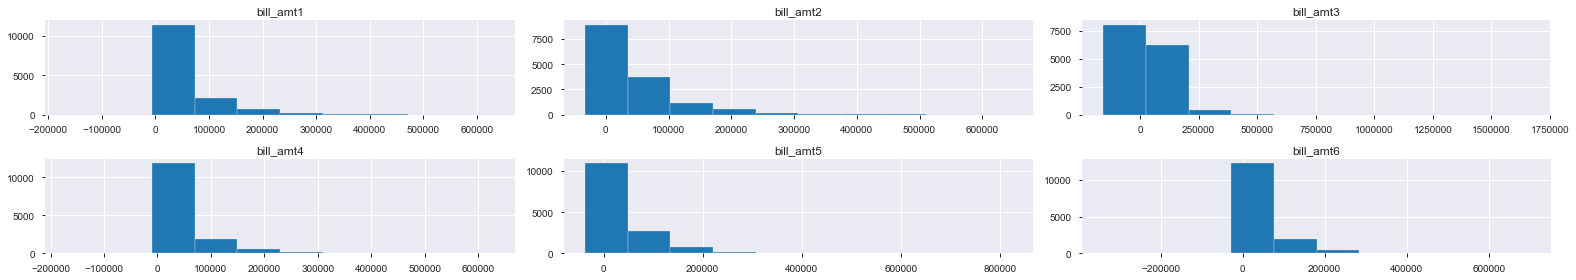

In [135]:
fig, axi = plt.subplots(nrows = 2,ncols = 3, figsize = (22,4))

for ax, col in zip(axi.flat, varfat):
    X_train[col].hist(ax=ax)
    ax.set_title(col)  
# Display the figure object    

fig.tight_layout();

As variáveis $\text{bill_amt1, ... , bill_amt6}$ referente ao faturamento possuem um comportamento assimétrico com cauda à direita para as variáveis além de valores negativos e discrepantes, iremos tratá-los.

- Os valores menores que zero iremos truncá-los em -1
- Os valores discrepantes iremos substiuí-los pelo quantil 95 de cada variável 

In [136]:
for i in varfat:
    X_train.loc[X_train[i] < 0, i] = -1
    X_train.loc[X_train[i] > X_train[i].quantile(.95), i] = X_train[i].quantile(.95).round(2)    

In [137]:
X_train[varfat].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000
mean,45465.435833,43660.609269,41584.696259,37836.649694,35909.492041,34676.928248
std,55233.247345,53301.090551,51412.922511,47647.546303,45800.515281,45161.987753
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3700.000000,3158.500000,2721.500000,2329.000000,1764.500000,1261.000000
50%,22048.500000,21085.500000,19967.500000,18810.500000,18122.000000,16871.500000
75%,64662.250000,62051.250000,58566.500000,50829.500000,49372.500000,48391.500000
max,191879.050000,186227.150000,180484.200000,168163.300000,161342.000000,158664.350000


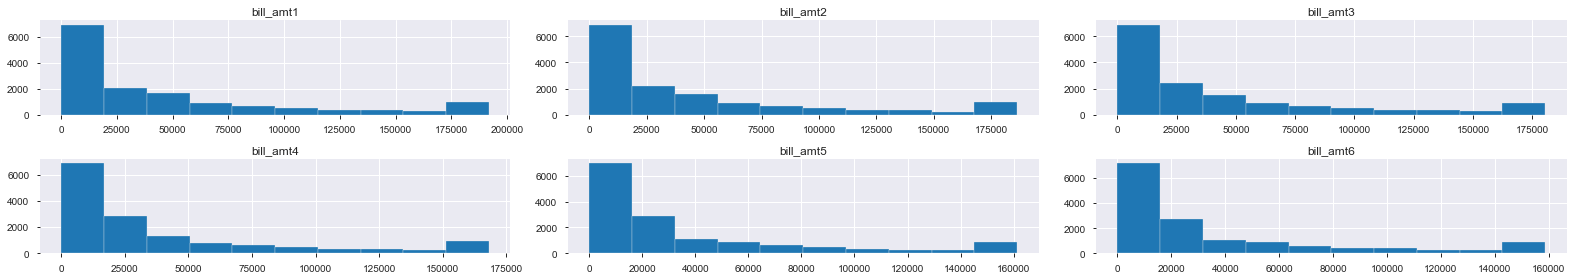

In [138]:
fig, axi = plt.subplots(nrows = 2,ncols = 3, figsize = (22,4))

for ax, col in zip(axi.flat, varfat):
    X_train[col].hist(ax=ax)
    ax.set_title(col)  
# Display the figure object    

fig.tight_layout();

In [139]:
X_train['bill_amt2'].describe()

count     14700.000000
mean      43660.609269
std       53301.090551
min          -1.000000
25%        3158.500000
50%       21085.500000
75%       62051.250000
max      186227.150000
Name: bill_amt2, dtype: float64

### Pagamento

In [140]:
varpay = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

####  Análise de Correlação

In [141]:
corr = X_train[varpay].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
pay_amt1,1.00,0.16,0.16,0.14,0.17,0.21
pay_amt2,0.16,1.00,0.18,0.13,0.22,0.17
pay_amt3,0.16,0.18,1.00,0.14,0.15,0.15
pay_amt4,0.14,0.13,0.14,1.00,0.14,0.14
pay_amt5,0.17,0.22,0.15,0.14,1.00,0.15
pay_amt6,0.21,0.17,0.15,0.14,0.15,1.00


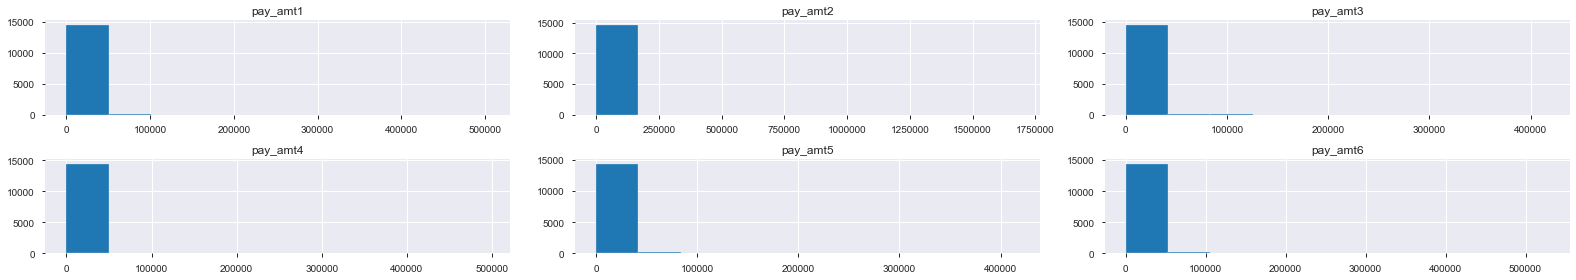

In [142]:
fig, axi = plt.subplots(nrows = 2,ncols = 3, figsize = (22,4))

for ax, col in zip(axi.flat, varpay):
    X_train[col].hist(ax=ax)
    ax.set_title(col)  
# Display the figure object    

fig.tight_layout();

Note que para as variáveis $\text{pay_amt1, ... , pay_amt6}$ de pagamento também há um comportamento assimétrico com cauda à direita porém não há negativos, iremos tratá-los.

- Os valores discrepantes iremos substiuí-los pelo quantil 95 de cada variável 

In [143]:
for i in varpay:
    X_train.loc[X_train[i] > X_train[i].quantile(.95), i] = X_train[i].quantile(.95).round(2)    

In [144]:
X_train[varpay].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000
mean,3899.297398,3829.084728,3165.294864,3035.039150,3083.597194,3091.556939
std,4658.530039,4856.134628,4101.396117,4019.149798,4103.976382,4349.058465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,949.750000,770.750000,326.000000,247.000000,247.750000,18.000000
50%,2074.500000,2000.000000,1600.000000,1498.500000,1500.000000,1400.000000
75%,5000.000000,5000.000000,4060.500000,4000.000000,4000.000000,4000.000000
max,18006.250000,18987.500000,15500.700000,15150.900000,15620.050000,16992.400000


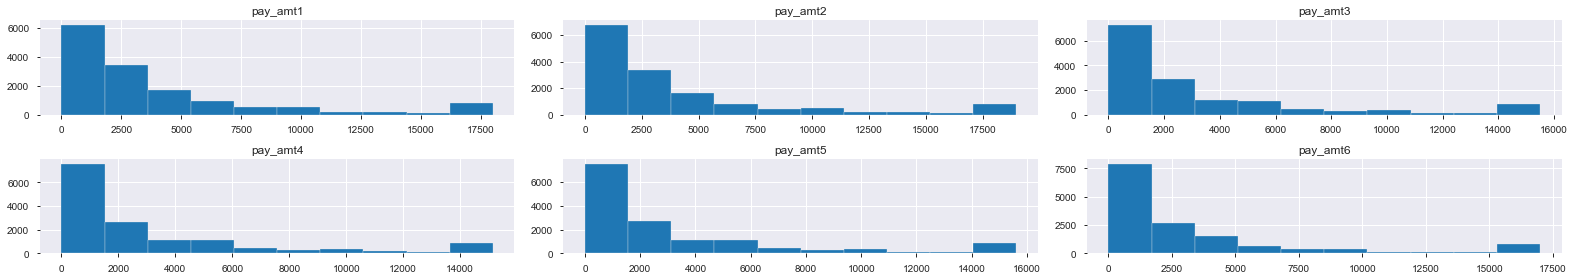

In [145]:
fig, axi = plt.subplots(nrows = 2,ncols = 3, figsize = (22,4))

for ax, col in zip(axi.flat, varpay):
    X_train[col].hist(ax=ax)
    ax.set_title(col)  
# Display the figure object    

fig.tight_layout();

In [146]:
# profile = ProfileReport(X_train,minimal=True)
# profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva2.html")

In [147]:
X_train_trat = X_train.copy()

In [148]:
X_train_trat.head()

,id,y,safra,limit_bal,sex,education,marriage,age,pay_0,pay_2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sum_bill,avg_bill,max_bill,sum_bill.1,avg_bill.1,max_bill.1
0,10911,1,200601,220000,2,2,1,53,0,0,...,6033.0,6247.0,6142.0,6146.0,1153692.0,192282.00,214669.0,39622.0,6603.67,8165.0
1,12564,0,200602,300000,2,1,2,31,0,0,...,658.0,662.0,0.0,0.0,17752.0,2958.67,11158.0,5020.0,836.67,2700.0
2,370,1,200510,20000,2,2,1,32,3,2,...,384.0,390.0,632.0,616.0,93331.0,15555.17,20631.0,3190.0,531.67,1168.0
3,7703,0,200512,410000,1,3,2,38,-1,-1,...,2558.0,2663.0,6303.0,12.0,18791.0,3131.83,6286.0,14035.0,2339.17,6303.0
4,7465,0,200512,100000,2,2,2,25,0,0,...,674.0,0.0,980.0,4413.0,15355.0,2559.17,8791.0,7067.0,1177.83,4413.0


In [149]:
X_train_trat >> select('id',contains('bill'))

,id,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,sum_bill,avg_bill,max_bill,sum_bill.1,avg_bill.1,max_bill.1
0,10911,191879.05,186227.15,180484.2,168163.3,161342.0,158664.35,1153692.0,192282.00,214669.0,39622.0,6603.67,8165.0
1,12564,11158.00,1616.00,3658.0,658.0,662.0,0.00,17752.0,2958.67,11158.0,5020.0,836.67,2700.0
2,370,20631.00,20010.00,19703.0,11084.0,10918.0,10985.00,93331.0,15555.17,20631.0,3190.0,531.67,1168.0
3,7703,4822.00,232.00,2255.0,2546.0,2650.0,6286.00,18791.0,3131.83,6286.0,14035.0,2339.17,6303.0
4,7465,8791.00,4910.00,0.0,674.0,0.0,980.00,15355.0,2559.17,8791.0,7067.0,1177.83,4413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,7764,46891.00,48134.00,49331.0,50508.0,51543.0,52685.00,299092.0,49848.67,52685.0,12000.0,2000.00,2000.0
14696,15378,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0
14697,17731,0.00,0.00,0.0,2580.0,2580.0,6941.00,12101.0,2016.83,6941.0,9521.0,1586.83,6941.0
14698,15726,28409.00,28530.00,29435.0,30841.0,29434.0,16565.00,163214.0,27202.33,30841.0,8096.0,1349.33,2000.0


# Save dataset

In [151]:
X_train_trat.to_csv('../output/X_train_trat.csv')